In [19]:
import tkinter as tk
from tkinter import filedialog
import os
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import cv2

A


Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-1-piudr4.dcm


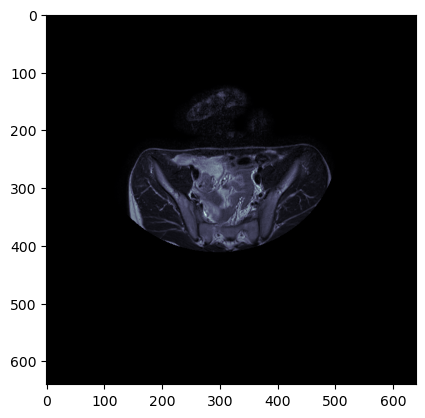

Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-10-1vjg3so.dcm


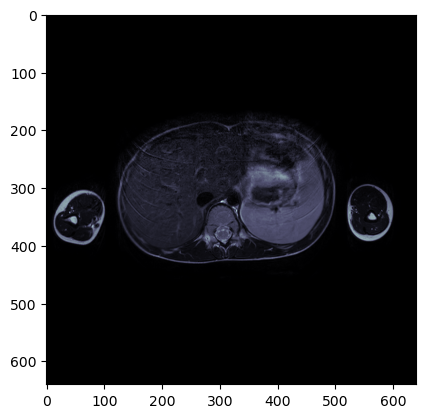

Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-11-1an4hik.dcm


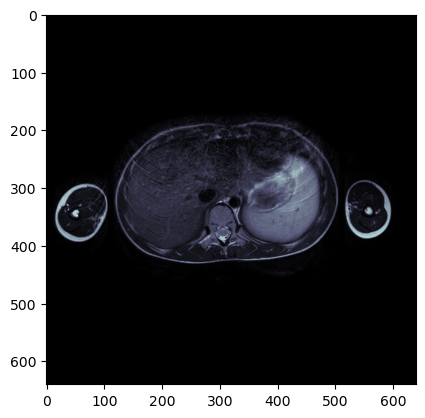

Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-12-1ej080d.dcm


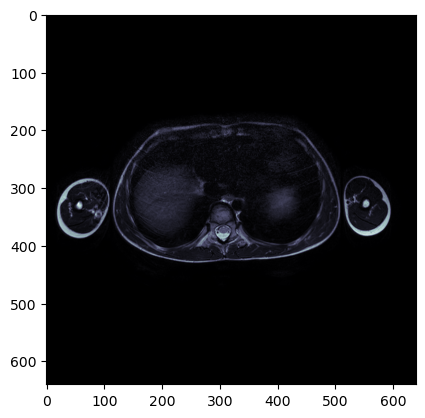

Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-13-1xlqgy2.dcm


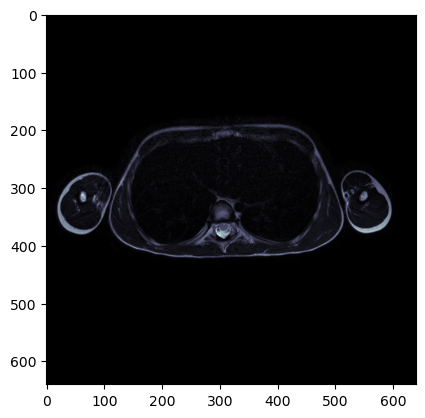

Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-14-9y8rsc.dcm


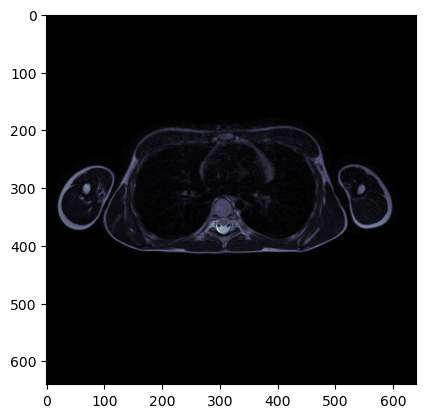

Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-15-wn2eh7.dcm


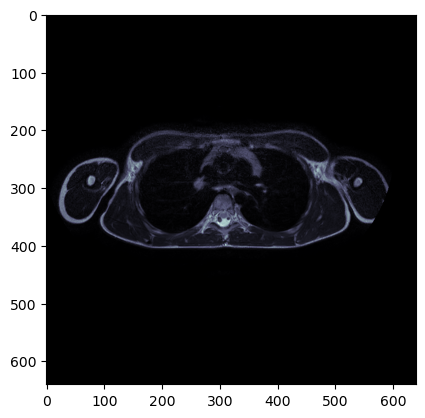

Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-16-rll2r0.dcm


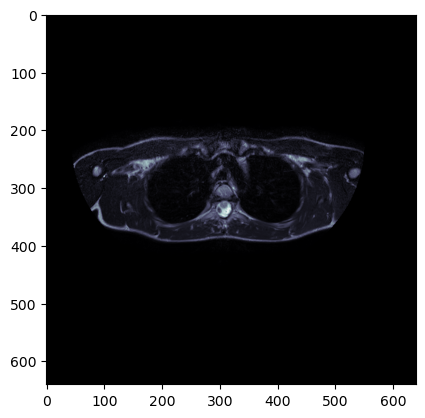

Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-17-1rz1w34.dcm


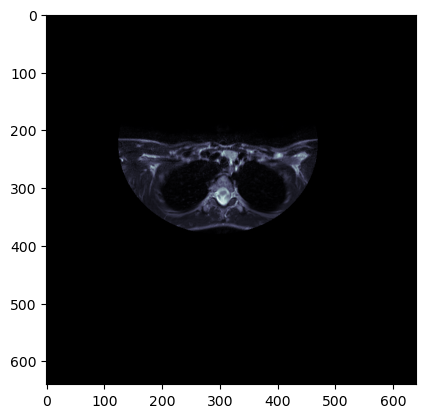

Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-2-1w20jdk.dcm


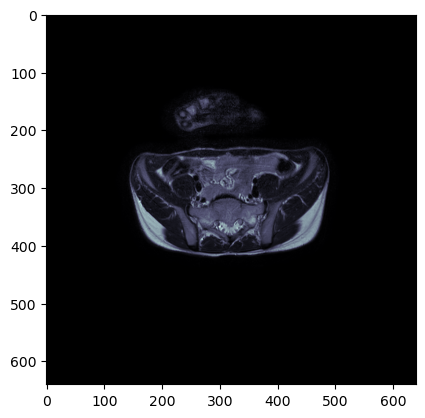

Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-3-14d57ju.dcm


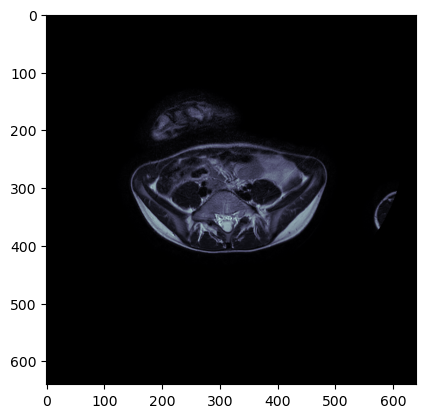

Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-4-s7mfvc.dcm


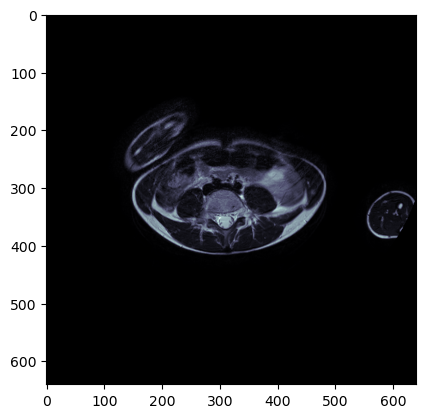

Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-5-1dxlndn.dcm


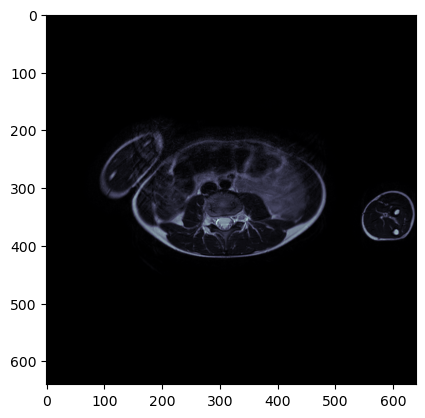

Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-6-er45zk.dcm


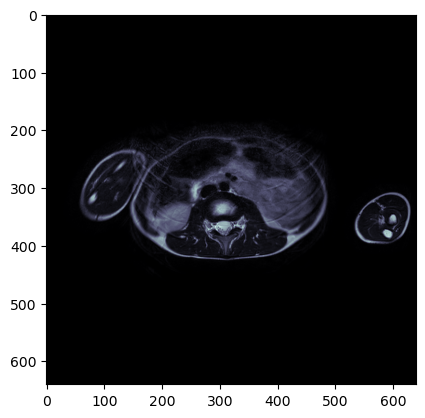

Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-7-1mwi5l1.dcm


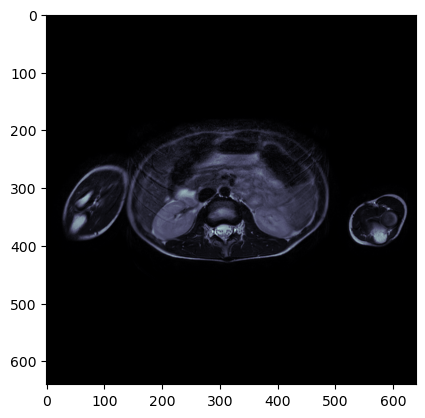

Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-8-10jfbnn.dcm


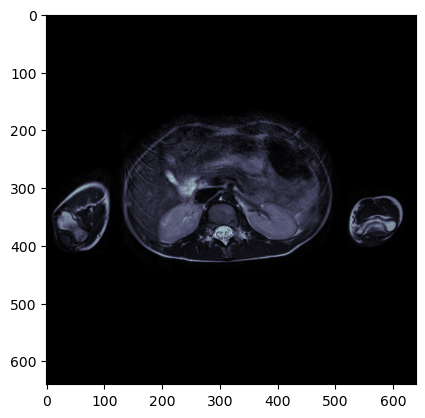

Name: 1.2.826.0.1.3680043.9.6827.9603988975826112909550587850567430829-501-9-19iu5pe.dcm


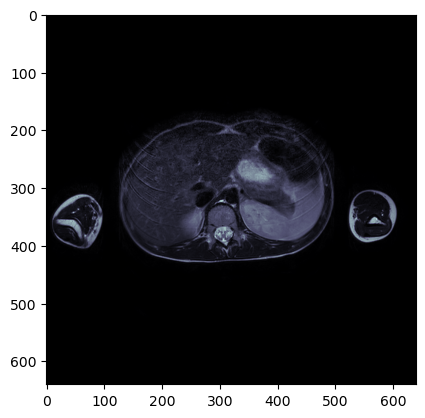

In [20]:
root = tk.Tk()
root.withdraw()

PathAux = filedialog.askdirectory(title="DICOM Images")
#Dcm_ROI = pydicom.dcmread(file_name)
#Dcm_im_ROI = np.copy(Dcm_ROI.pixel_array)
    
Dcm_im_all = []

for root,dirs,files in os.walk(PathAux):
    for i in files:
        if i.endswith(".dcm"):
            file_name=os.path.join(root,i)                  #Lee path de cada imagen
            Dcm = pydicom.dcmread(file_name)
            Dcm_im = np.copy(Dcm.pixel_array)
            Dcm_im_all.append(Dcm_im)
        print('Name:',i)
        plt.imshow(Dcm_im, cmap = plt.cm.bone)
        plt.show()

1128


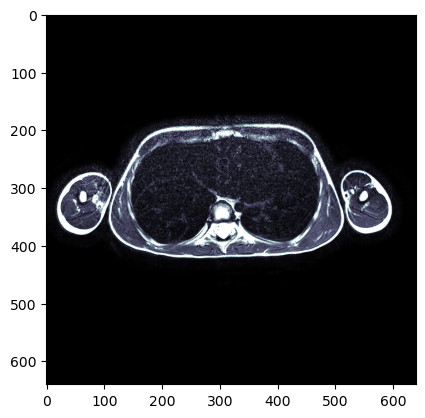

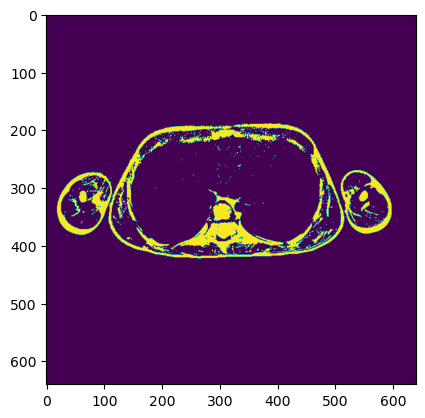

In [126]:
print(Dcm_im_all[1].max())


min_value = int(np.min(Dcm_im_all[1]))
max_value = int(np.max(Dcm_im_all[1]))
image = sitk.GetImageFromArray(Dcm_im_all[4])

# Aplicar un estiramiento del histograma lineal
mask = sitk.IntensityWindowing(image, min_value, 255, 0, 255)


binary_image1 = sitk.GetArrayFromImage(mask)



plt.imshow(binary_image1,cmap = plt.cm.bone)
plt.show()

# Assuming 'image' is your SimpleITK image
otsu_filter = sitk.OtsuThresholdImageFilter()

# # Get the calculated threshold value
# threshold_value = otsu_filter

# # Apply the threshold to get the binary image
#binary_image = image > 200

# Set the input image

# Optionally, specify the number of bins for the histogram (default is 128)
#otsu_filter.SetNumberOfHistogramBins(256)

# Optionally, specify the number of classes for Otsu thresholding (default is 1)
otsu_filter.SetInsideValue(0)
otsu_filter.SetOutsideValue(1)

# Execute the filter
binary_image = otsu_filter.Execute(mask)

# Display the original and binary images for visualization
#sitk.Show(sitk.LabelOverlay(image, binary_image), title="Otsu Thresholding")

imagefinal = sitk.GetArrayFromImage(binary_image)

plt.imshow(imagefinal)
plt.show()

#sitk.Show(bin_image, title="Binary Image", backend="matplotlib")

# image_viewer = sitk.ImageViewer()
# image_viewer.SetTitle("grid using ImageViewer class")
# image_viewer.Execute(bin_image)


In [190]:
# Assuming 'binary_image' is your SimpleITK binary image
binary_erode_filter = sitk.BinaryDilateImageFilter()

# Set the input binary image
#binary_erode_filter.SetInput(binary_image)

# Optionally, specify the radius of the structuring element (default is 1)
binary_erode_filter.SetKernelRadius(1)


# Optionally, specify the number of iterations (default is 1)
binary_erode_filter.SetNumberOfThreads(1)

# Execute the filter
eroded_binary_image = binary_erode_filter.Execute(binary_image)

# Display the original and eroded binary images for visualization
#sitk.Show(sitk.LabelOverlay(binary_image, eroded_binary_image), title="Binary Erosion")

In [191]:
eroded_array = sitk.GetArrayFromImage(eroded_binary_image)

In [192]:
non_zero_at_extremes = np.any(eroded_array[0, :] != 0) or \
                       np.any(eroded_array[-1, :] != 0) or \
                       np.any(eroded_array[:, 0] != 0) or \
                       np.any(eroded_array[:,-1]!=0)

if non_zero_at_extremes:

    pad_size = [50, 50, 0] 
# Especifica el valor que deseas asignar a los píxeles agregados
    pad_value = sitk.GetArrayFromImage(eroded_binary_image).max()
    pad_value = np.double(pad_value)

# Aplica el relleno constante a la imagen
    padded_image = sitk.ConstantPad(eroded_binary_image, pad_size, pad_size, pad_value)

else:
    padded_image = eroded_binary_image
# Muestra la imagen original y la imagen ampliada para visualización
#sitk.Show([image, padded_image], title=["Imagen Original", "Imagen Ampliada"])

In [193]:
print(non_zero_at_extremes)

False


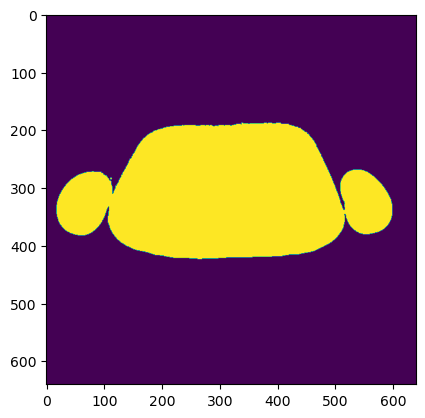

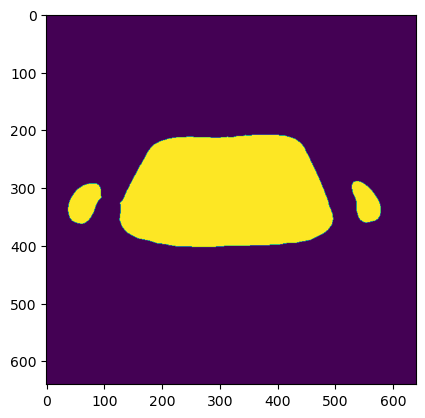

In [194]:

paddd = sitk.GetArrayFromImage(padded_image)

fillhole_filter = sitk.BinaryFillholeImageFilter()

# Aplicar el filtro a la máscara binaria
mask_filled = fillhole_filter.Execute(padded_image)
paddd = sitk.GetArrayFromImage(mask_filled)

plt.imshow(paddd)
plt.show()

erode_filter = sitk.BinaryErodeImageFilter()
# Configurar los parámetros del filtro (tamaño del elemento estructurante, etc.)
erode_filter.SetKernelType(sitk.sitkBall)  # Tipo de elemento estructurante (por ejemplo, bola)
erode_filter.SetKernelRadius(20)  # Radio del elemento estructurante

# Aplicar el filtro a la imagen
imagen_erodida = erode_filter.Execute(mask_filled)


paddd = sitk.GetArrayFromImage(imagen_erodida)


plt.imshow(paddd)
plt.show()

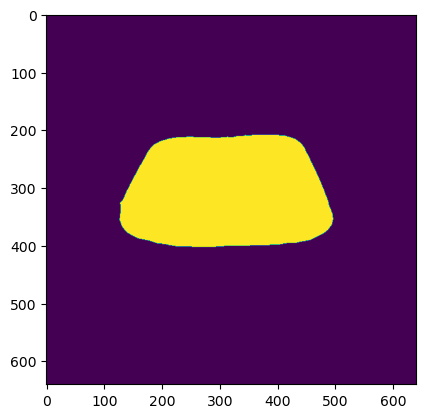

In [195]:
#binary_image = sitk.Image(Dcm_im_all[1])
#binary_image[20:50, 25:125] = 1
#binary_image[70:95, 40:60] = 1
#binary_image[70:95, 80:140] = 1

#imagen_invertida = sitk.InvertIntensity(padded_image)
component_image = sitk.ConnectedComponent(imagen_erodida)
sorted_component_image = sitk.RelabelComponent(component_image, sortByObjectSize=True)
largest_component_binary_image = sorted_component_image == 1
largest_component_binary_image = sitk.Not(largest_component_binary_image)
# Ensure both images have the same pixel type (e.g., 16-bit unsigned integer)
common_pixel_type = sitk.sitkUInt16

#onefatlessimage = sitk.Multiply(padded_image, largest_component_binary_image)

# component_image = sitk.ConnectedComponent(onefatlessimage)
# sorted_component_image = sitk.RelabelComponent(component_image, sortByObjectSize=True)
# largest_component_binary_image = sorted_component_image == 1
# largest_component_binary_image = sitk.Not(largest_component_binary_image)
# onefatlessimage = sitk.Multiply(onefatlessimage, largest_component_binary_image)


imagefinal = sitk.GetArrayFromImage(largest_component_binary_image)
imagen_invertida = sitk.InvertIntensity(largest_component_binary_image)
imagefinal = sitk.GetArrayFromImage(imagen_invertida )

plt.imshow(imagefinal)
plt.show()

# Realizar la operación OR entre las máscaras binarias


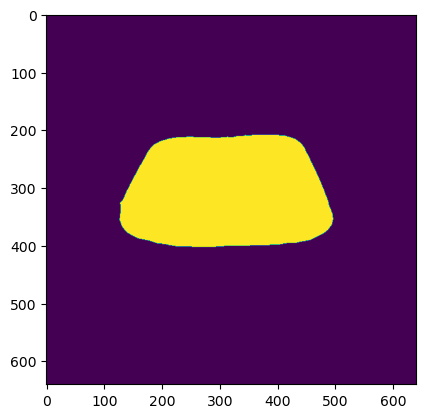

In [197]:

dilate_filter = sitk.BinaryDilateImageFilter()
# Configurar los parámetros del filtro (tamaño del elemento estructurante, etc.)
dilate_filter.SetKernelType(sitk.sitkBall)  # Tipo de elemento estructurante (por ejemplo, bola)
dilate_filter.SetKernelRadius(20)  # Radio del elemento estructurante

# Aplicar el filtro a la imagen
imagen_dilatada = dilate_filter.Execute(imagen_invertida)

imagefinal = sitk.GetArrayFromImage(imagen_dilatada )

plt.imshow(imagefinal)
plt.show()

In [212]:
original= sitk.GetImageFromArray(Dcm_im_all[1])

imagen_converted = sitk.Cast(Dcm_im_all[1], imagen_dilatada.GetPixelID())
image = sitk.Multiply(imagen_dilatada, imagen_converted)


# Obtener las dimensiones de la imagen
size = image.GetSize()
mitad_x = size[0] 
mitad_y = size[1] // 2

# Crear una imagen negra de la mitad del tamaño de la imagen original
imagen_negra = sitk.Image([mitad_x, mitad_y], sitk.sitkUInt16)  # Cambiado a UInt16
imagen_negra.SetOrigin(image.GetOrigin())
imagen_negra.SetSpacing(image.GetSpacing())

# Convertir la imagen negra al mismo tipo de píxel que la imagen original
imagen_negra = sitk.Cast(imagen_negra, image.GetPixelID())

# Pegar la imagen negra en la esquina superior izquierda de la imagen original
paste_filter = sitk.PasteImageFilter()
paste_filter.SetSourceSize(imagen_negra.GetSize())
paste_filter.SetSourceIndex([0, 0])
paste_filter.SetDestinationIndex([0, 0])
imagen_resultante = paste_filter.Execute(image, imagen_negra)
imagefinal2 = sitk.GetArrayFromImage(imagen_resultante)
plt.imshow(imagefinal2)
plt.show()


TypeError: in method 'Cast', argument 1 of type 'itk::simple::Image const &'

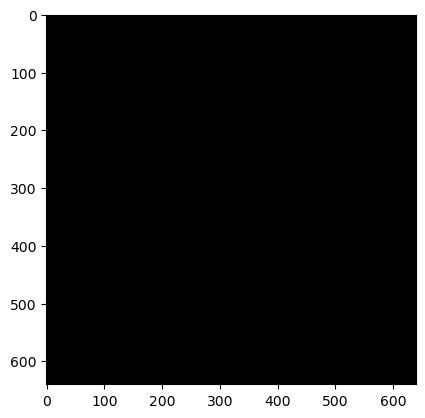

In [189]:
import cv2
# THRESHOLDING - Mask for the volume
# Otsu thresholding

#otsu thresholding
# otsu_thres = filters

# # Apply Otsu's thresholding
# threshold_value = filters.threshold_otsu(edge_enhanced_image)
# otsuthresholded_image = edge_enhanced_image >= threshold_value
# otsuthresholded_image = np.uint8(otsuthresholded_image)

kernel = np.ones((16, 16), np.uint8)  # Adjust the size of the kernel as needed
otsuthresholded_image = cv2.morphologyEx(imaefinalposta, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((16, 16), np.uint8)  # Adjust the size of the kernel as needed
otsuthresholded_image = cv2.morphologyEx(otsuthresholded_image, cv2.MORPH_ERODE, kernel)

plt.imshow(otsuthresholded_image, cmap='gray')

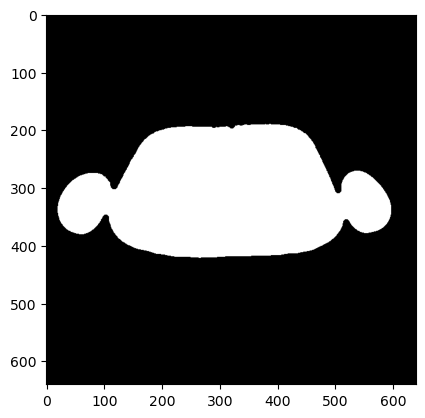

In [102]:
def rough_contour(image):
    # Detect the boundary separating the skin and the background to produce a rough mask
    # Transverse image from the four sides, pixel by pixel
    # 0-1 (black-white) transition or white--> border pointer b(x,y)
    # Then, a region Rh is found delimited by b(x,y)
    dimensions = image.shape
    mask = np.zeros(dimensions)

    # Vertical edges: transition from up to bottom
    for j in range(1, dimensions[1]):
        count = 0
        for i in range(1, dimensions[0] - 1):
            if count == 0:
                if image[i, j] != image[i - 1, j]:
                    mask[i, j] = 1
                    count = 1

    # Vertical edges: transition from bottom to up
    for j in range(1, dimensions[1]):
        count = 0
        for i in range(dimensions[0] - 1, 1, -1):
            if count == 0:
                if image[i - 1, j] != image[i, j]:
                    mask[i - 1, j] = 1
                    count = 1

    # Horizontal edges: from left to right
    for i in range(1, dimensions[0]):
        count = 0
        for j in range(1, dimensions[1]):
            if count == 0:
                if image[i, j - 1] != image[i, j]:
                    mask[i, j] = 1
                    count = 1

    # Horizontal edges: from right to left
    for i in range(1, dimensions[0]):
        count = 0
        for j in range(dimensions[1] - 1, 1, -1):
            if (image[1,j] ==1):
                print("hola")
            if count == 0:
                if image[i, j - 1] != image[i, j]:
                    mask[i, j - 1] = 1
                    count = 1

    # Create 4 masks, one for filling in one direction and then compute the intersection between them
    mask1 = mask.copy()
    mask2 = mask.copy()
    mask3 = mask.copy()
    mask4 = mask.copy()
    mask5 = mask.copy()
    mask6 = mask.copy()

    # Filling downwards
    for j in range(dimensions[1]):
        for i in range(dimensions[0]):
            if mask1[i, j] == 1:  # check if current pixel is the first one
                mask1[i+1:, j] = 1  # set all pixels in the same column, after this position to 1
                break

    # Filling upwards
    for j in range(dimensions[1]):
        for i in range(dimensions[0] - 1, 1, -1):
            if mask2[i, j] == 1:
                mask2[:i, j] = 1
                break

    # Filling from left
    for i in range(dimensions[0]):
        for j in range(dimensions[1]):
            if mask3[i, j] == 1:
                mask3[i, j+1:] = 1
                break

    # Filling from right
    for i in range(dimensions[0]):
        for j in range(dimensions[1] - 1, 1, -1):
            if mask4[i, j] == 1:
                mask4[i, :j] = 1
                break



    # Diagonal desde la esquina inferior derecha a la superior izquierda
    # for i in range(dimensions[0] - 1, 1, -1):
    #     count = 0
    #     for j in range(dimensions[1] - 1, 1, -1):
    #         if count == 0:
    #             if image[i, j] != 1:
    #                 mask6[i, j] = 1
    #                 count = 1
    #         if count == 1:  # Rellenar la diagonal si se ha encontrado el cambio
    #             if i > 0 and j < dimensions[1] - 1:
    #                 mask6[i-1,j+1]=1
    #                 mask6[i,j] = 1
        
    filas, columnas = image.shape

    # the head image is the intersection of the four masks
    #h_image = mask1 & mask2 & mask3 & mask4
    # Ensure all masks have the same data type and shape
    mask1 = mask1.astype(np.uint8)
    mask2 = mask2.astype(np.uint8)
    mask3 = mask3.astype(np.uint8)
    mask4 = mask4.astype(np.uint8)
    mask5 = mask5.astype(np.uint8)
    mask6 = mask6.astype(np.uint8)

    # the head image is the intersection of the four masks
    mask_image = cv2.bitwise_and(mask1, cv2.bitwise_and(mask2, cv2.bitwise_or(mask3, mask4)))
    #mask_image = cv2.bitwise_or(mask5, mask6)



    return mask_image

first_trunk_mask = rough_contour(imaefinalposta)
# plt.imshow(trunk_mask, cmap=plt.cm.gray)
# plt.show()


#first_trunk_mask = np.bitwise_or(trunk_mask, thresholded_image)
plt.imshow(first_trunk_mask, cmap=plt.cm.gray)
plt.show()

In [31]:
contornos,_=cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

NameError: name 'th' is not defined